# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count# remove the cities name
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    #sleep to protect API key of too many calls at the same time    
    count = 5
    while count < 5:
        time.sleep(2)
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}APPID={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | siguiri
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | kota bahru
Processing Record 6 of Set 1 | malvern
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | jimeta
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | quarai
Processing Record 13 of Set 1 | misratah
Processing Record 14 of Set 1 | nadym
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | san borja
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | padang
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | itoman
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | piranhas
Processing Record 41 of Set 4 | otane
Processing Record 42 of Set 4 | cedar hill
Processing Record 43 of Set 4 | nyagan
Processing Record 44 of Set 4 | rongcheng
Processing Record 45 of Set 4 | karoi
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | mastic beach
Processing Record 48 of Set 4 | hartselle
Processing Record 49 of Set 4 | touros
Processing Record 0 of Set 5 | kruisfontein
Processing Record 1 of Set 5 | leh
Processing Record 2 of Set 5 | selcuk
Processing Record 3 of Set 5 | derzhavinsk
Processing Record 4 of Set 5 | tjome
Processing Record 5 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 5 | evinayong
Processing Record 7 of Set 5 | atherton
Processing Record 8 of Set 5 | husavik
Process

Processing Record 27 of Set 8 | tokur
Processing Record 28 of Set 8 | gamba
Processing Record 29 of Set 8 | mananara
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | mindif
Processing Record 32 of Set 8 | taoudenni
Processing Record 33 of Set 8 | appingedam
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | villarrobledo
Processing Record 36 of Set 8 | san-pedro
Processing Record 37 of Set 8 | utiroa
City not found. Skipping...
Processing Record 38 of Set 8 | okhotsk
Processing Record 39 of Set 8 | puerto baquerizo moreno
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | el bagre
Processing Record 42 of Set 8 | ughelli
Processing Record 43 of Set 8 | gorodovikovsk
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | yinchuan
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | la palma
Processing Record 48 of Set 8 | san cristobal
Processing Record 49 of Set 8 | shieli
Processing R

Processing Record 13 of Set 12 | tam ky
Processing Record 14 of Set 12 | phalodi
Processing Record 15 of Set 12 | simoes
Processing Record 16 of Set 12 | smidovich
Processing Record 17 of Set 12 | riyadh
Processing Record 18 of Set 12 | koping
Processing Record 19 of Set 12 | iralaya
Processing Record 20 of Set 12 | mbandaka
Processing Record 21 of Set 12 | zanjan
Processing Record 22 of Set 12 | santo andre
Processing Record 23 of Set 12 | manuk mangkaw
Processing Record 24 of Set 12 | zhezkazgan
Processing Record 25 of Set 12 | salsk
Processing Record 26 of Set 12 | marzuq
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | talaya
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | zyryanka
Processing Record 31 of Set 12 | kindersley
Processing Record 32 of Set 12 | mercedes
Processing Record 33 of Set 12 | portneuf
Processing Record 34 of Set 12 | ahuimanu
Processing Record 35 of Set 12 | krasnoborsk
Processing Record 36 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vardo,70.3705,31.1107,-10.01,85,100,5.14,NO,1678031129
1,ponta do sol,32.6667,-17.1000,21.11,87,89,3.89,PT,1678031129
2,siguiri,11.6667,-9.5000,39.09,10,51,2.97,GN,1678031129
3,cape town,-33.9258,18.4232,19.23,92,75,7.20,ZA,1678031130
4,kota bahru,6.1333,102.2386,24.97,78,20,1.54,MY,1678031130


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vardo,70.3705,31.1107,-10.01,85,100,5.14,NO,1678031129
1,ponta do sol,32.6667,-17.1000,21.11,87,89,3.89,PT,1678031129
2,siguiri,11.6667,-9.5000,39.09,10,51,2.97,GN,1678031129
3,cape town,-33.9258,18.4232,19.23,92,75,7.20,ZA,1678031130
4,kota bahru,6.1333,102.2386,24.97,78,20,1.54,MY,1678031130


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

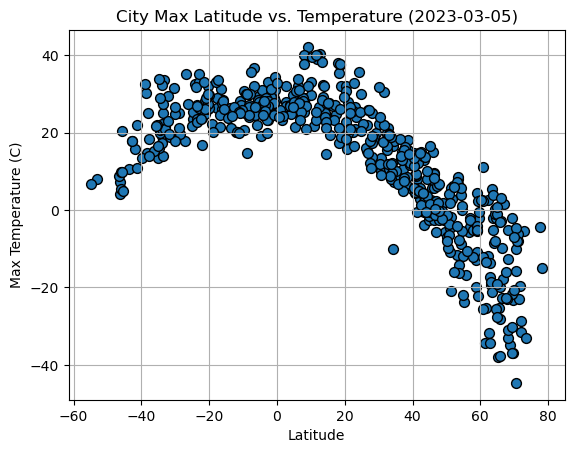

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp", s= 50, edgecolors= "black")

#convert Unix Epoch to Datetime
date = city_data_df.iloc[1,8]
convertingDate = datetime.fromtimestamp(date)
convertingDateToStr = convertingDate.strftime("%Y-%m-%d") 

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

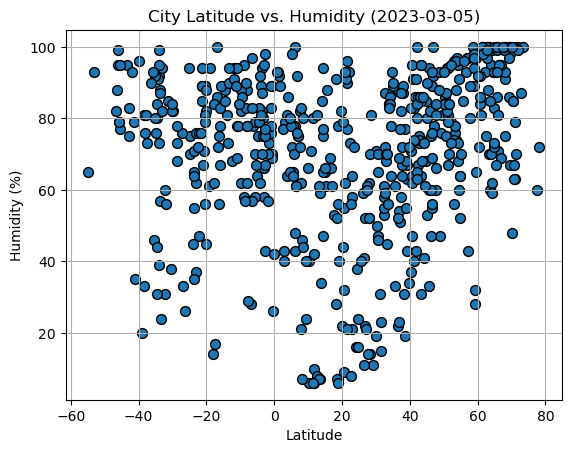

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

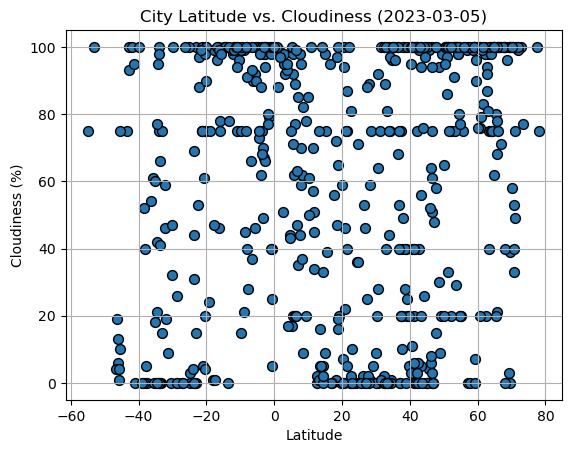

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

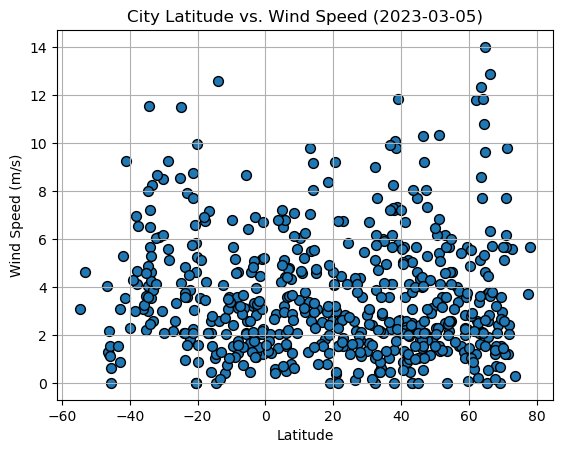

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed", s= 50, edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({convertingDateToStr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def reg(x,y,ylabel,title,location): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,location,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.iloc[:,1] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vardo,70.3705,31.1107,-10.01,85,100,5.14,NO,1678031129
1,ponta do sol,32.6667,-17.1000,21.11,87,89,3.89,PT,1678031129
2,siguiri,11.6667,-9.5000,39.09,10,51,2.97,GN,1678031129
4,kota bahru,6.1333,102.2386,24.97,78,20,1.54,MY,1678031130
5,malvern,34.3623,-92.8130,16.52,78,1,2.82,US,1678031130


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.iloc[:,1] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cape town,-33.9258,18.4232,19.23,92,75,7.20,ZA,1678031130
6,mataura,-46.1927,168.8643,4.15,99,6,1.19,NZ,1678031131
7,punta arenas,-53.1500,-70.9167,8.06,93,100,4.63,CL,1678030959
10,quarai,-30.3875,-56.4514,31.44,38,0,2.99,BR,1678031134
13,ushuaia,-54.8000,-68.3000,6.81,65,75,3.09,AR,1678031134


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7779691912834279


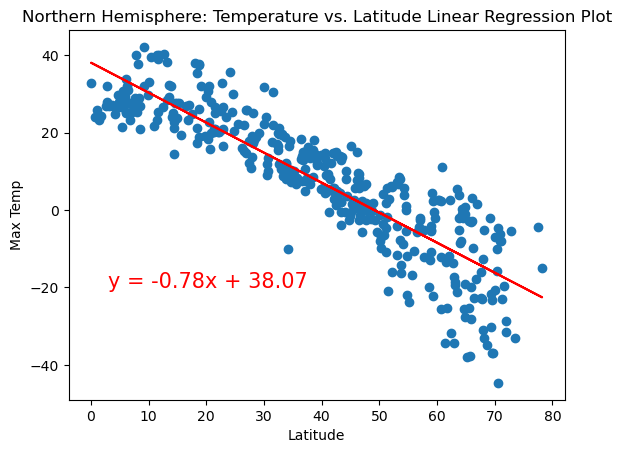

In [15]:
# Linear regression on Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp","Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot",(3,-20))    

The r-squared is: 0.3423148314198953


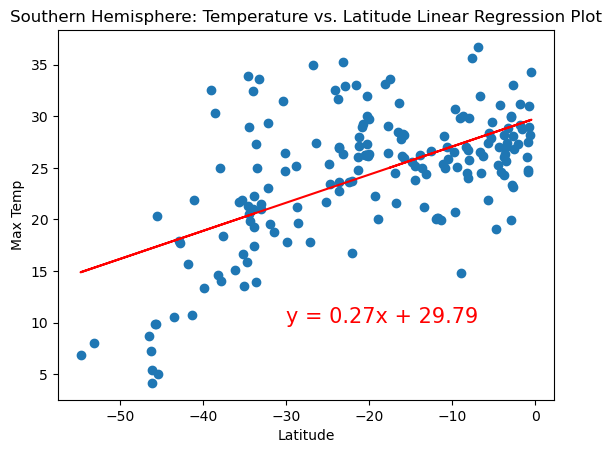

In [16]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp","Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot",(-30,10)) 

**Discussion about the linear relationship:**  The R-Squared for the Northern Hemisphere is 0.77, what is considered a strong strength of the regression model. That means that the variability observed is well explained by the regression model. However, the R-Squared for the Southern Hemisphere is only 0.34, what is considered a weak strength of the regression model. 
More statistical data is needed in order to draw a definitive conclusion.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18967447505951132


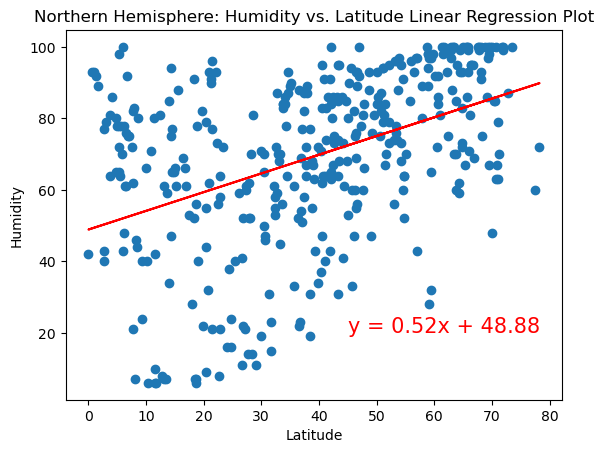

In [17]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity","Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot",(45,20))    

The r-squared is: 6.61232899053556e-05


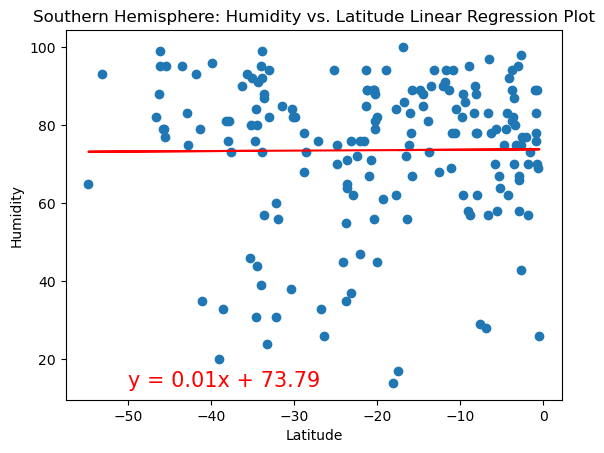

In [61]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity","Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot",(-50,13)) 

**Discussion about the linear relationship:** The R-Squared for the Northern Hemisphere is only 0.18, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.00006, also a very weak strength.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06785710551519544


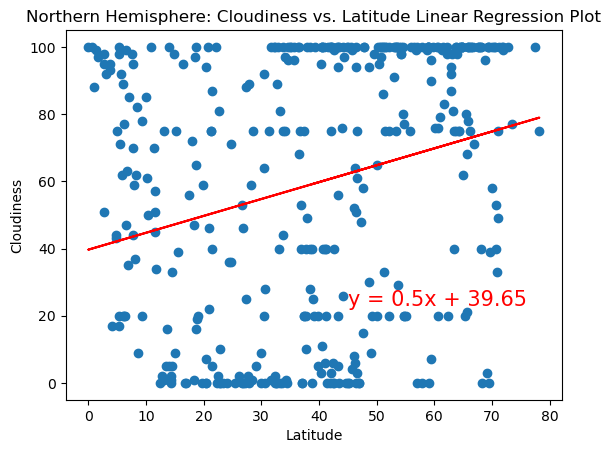

In [60]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness","Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot",(45,23))    

The r-squared is: 0.1789253564317532


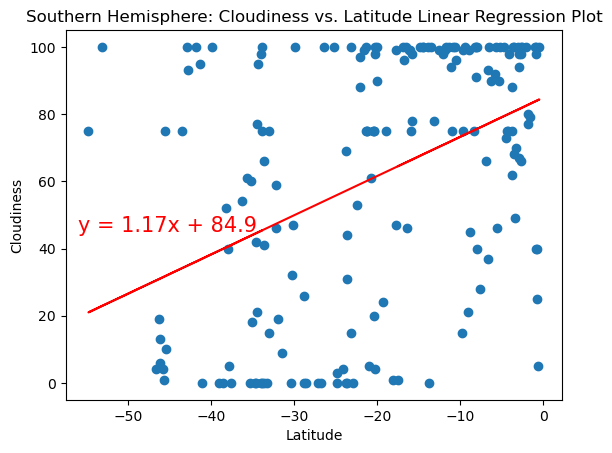

In [58]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness","Southern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot",(-56,45))

**Discussion about the linear relationship:**

The R-Squared for the Northern Hemisphere is only 0.06, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.17, also a very weak strength.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002912254600984902


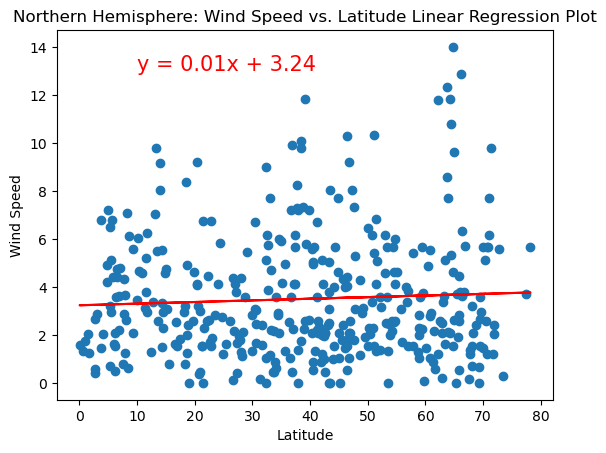

In [47]:
# Northern Hemisphere
reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed","Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot",(10,13))    

The r-squared is: 0.02781249784219266


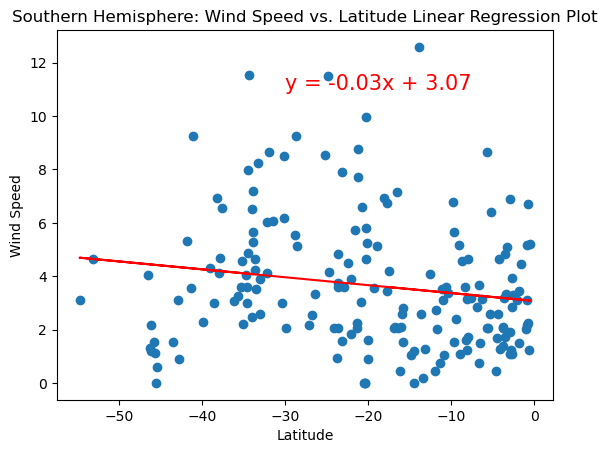

In [50]:
# Southern Hemisphere
reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed","Southern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot",(-30,11))

**Discussion about the linear relationship:** The R-Squared for the Northern Hemisphere is only 0.002, what is considered a very weak strength of the regression model. Moreover, the R-Squared for the Southern Hemisphere is only 0.027, also a very weak strength.